
## Lead scoring_case_study


### Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

There are a lot of leads generated in the initial stage, but only a few of them come out as paying customers. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.



### Goals of the Case Study
There are quite a few goals for this case study.

1. Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.


2. There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

### Approach
1. Importing Data
2. Inspecting the Dataframe
3. Data Preparation (Encoding Categorical Variables, Handling Null Values)
4. EDA (univariate analysis, outlier detection, checking data imbalance)
5. Dummy Variable Creation
6. Test-Train Split
7. Feature Scaling
8. Model Building (Feature Selection Using RFE, Improvising the model further inspecting adjusted R-squared, VIF and p-vales)
9. Build final model
10. Model evaluation with different metrics Sensitivity, Specificity

## Import data

In [388]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler

In [389]:
df=pd.read_csv("Leads.csv")
df.head(5)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,...,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.00,674,2.50,...,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.00,20.00,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,...,No,Select,Mumbai,02.Medium,01.High,13.00,17.00,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,...,No,Select,Mumbai,02.Medium,01.High,15.00,18.00,No,No,Modified


### Inspecting dataframe

In [390]:
df.shape

(9240, 37)

In [391]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [392]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.00,9240.00,9103.00,9240.00,9103.00,5022.00,5022.00
mean,617188.44,0.39,3.45,487.70,2.36,14.31,16.34
std,23406.00,0.49,4.85,548.02,2.16,1.39,1.81
min,579533.00,0.00,0.00,0.00,0.00,7.00,11.00
25%,596484.50,0.00,1.00,12.00,1.00,14.00,15.00
50%,615479.00,0.00,3.00,248.00,2.00,14.00,16.00
75%,637387.25,1.00,5.00,936.00,3.00,15.00,18.00
max,660737.00,1.00,251.00,2272.00,55.00,18.00,20.00


In [393]:
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [394]:
# Missing Data Percentage 

round(df.isnull().sum()/ len(df),2)

Prospect ID                                     0.00
Lead Number                                     0.00
Lead Origin                                     0.00
Lead Source                                     0.00
Do Not Email                                    0.00
Do Not Call                                     0.00
Converted                                       0.00
TotalVisits                                     0.01
Total Time Spent on Website                     0.00
Page Views Per Visit                            0.01
Last Activity                                   0.01
Country                                         0.27
Specialization                                  0.16
How did you hear about X Education              0.24
What is your current occupation                 0.29
What matters most to you in choosing a course   0.29
Search                                          0.00
Magazine                                        0.00
Newspaper Article                             

## Data Preparation

In [395]:
#dropping Lead Number and Prospect ID since they have all unique values
df = df.drop(columns=['Lead Number', 'Prospect ID'])
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,NaN,...,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Modified
1,API,Organic Search,No,No,0,5.00,674,2.50,Email Opened,India,...,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,Email Opened,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.00,20.00,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,Unreachable,India,...,No,Select,Mumbai,02.Medium,01.High,13.00,17.00,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,Converted to Lead,India,...,No,Select,Mumbai,02.Medium,01.High,15.00,18.00,No,No,Modified


In [396]:
#Converting 'Select' values to NaN.
df = df.replace('Select', np.nan)

In [397]:
df.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [398]:
round((df.isnull().sum()/len(df.index)), 2)

Lead Origin                                     0.00
Lead Source                                     0.00
Do Not Email                                    0.00
Do Not Call                                     0.00
Converted                                       0.00
TotalVisits                                     0.01
Total Time Spent on Website                     0.00
Page Views Per Visit                            0.01
Last Activity                                   0.01
Country                                         0.27
Specialization                                  0.37
How did you hear about X Education              0.78
What is your current occupation                 0.29
What matters most to you in choosing a course   0.29
Search                                          0.00
Magazine                                        0.00
Newspaper Article                               0.00
X Education Forums                              0.00
Newspaper                                     

In [399]:
#dropping cols with more than 45% missing values

cols=df.columns

for i in cols:
    if((100*(df[i].isnull().sum()/len(df.index))) >= 45):
        df.drop(i, 1, inplace = True)

In [400]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                         26.63
Specialization                                  36.58
What is your current occupation                 29.11
What matters most to you in choosing a course   29.32
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [401]:
#checking value counts of Country column

df['Country'].value_counts(dropna=False,ascending=True)

Tanzania                   1
Sri Lanka                  1
Denmark                    1
Switzerland                1
Malaysia                   1
Indonesia                  1
Russia                     1
Vietnam                    1
Liberia                    1
Kenya                      1
Ghana                      2
Netherlands                2
Belgium                    2
Italy                      2
China                      2
Bangladesh                 2
Asia/Pacific Region        2
Uganda                     2
Philippines                2
Sweden                     3
Canada                     4
Kuwait                     4
Nigeria                    4
Germany                    4
South Africa               4
unknown                    5
France                     6
Oman                       6
Hong Kong                  7
Bahrain                    7
Qatar                     10
Australia                 13
United Kingdom            15
Saudi Arabia              21
Singapore     

### Exploratory Data Analysis


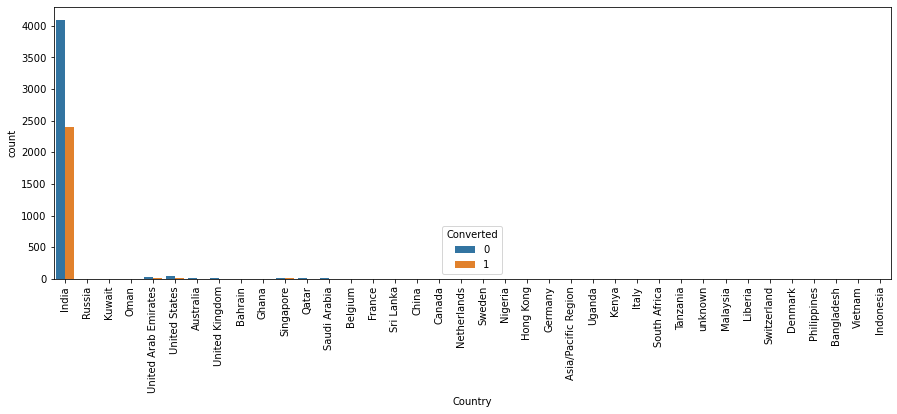

In [402]:
#plotting spread of Country columnn 
plt.figure(figsize=(15,5))
s1=sns.countplot(df.Country, hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [403]:
# Since India is the most common occurence among the non-missing values we can impute all missing values with India
df['Country'] = df['Country'].replace(np.nan,'India')

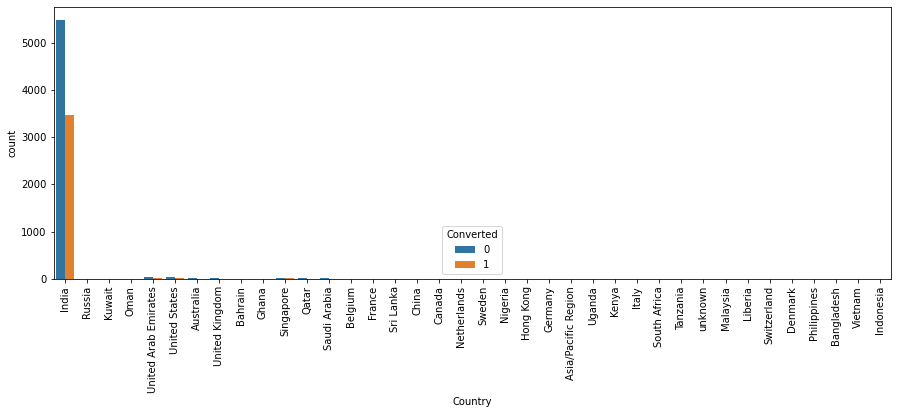

In [404]:
#plotting spread of Country columnn after replacing NaN values

plt.figure(figsize=(15,5))
s1=sns.countplot(df.Country, hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

**As we can see the Number of Values for India are quite high (nearly 97% of the Data), this column can be dropped**

In [405]:
#creating a list of columns to be droppped
drop_col=['Country']

In [406]:
#checking value counts of "City" column
df['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [407]:
df['City'] = df['City'].replace(np.nan,'Mumbai')

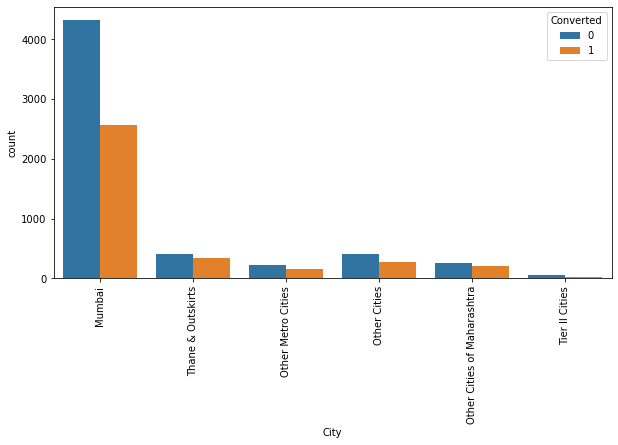

In [408]:
#plotting spread of City columnn after replacing NaN values

plt.figure(figsize=(10,5))
s1=sns.countplot(df.City, hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [409]:
#checking value counts of Specialization column
df['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [410]:
# Lead may not have mentioned specialization because it was not in the list or maybe they are a students 
# and don't have a specialization yet. So we will replace NaN values here with 'Not Specified'

df['Specialization'] = df['Specialization'].replace(np.nan, 'Not Specified')

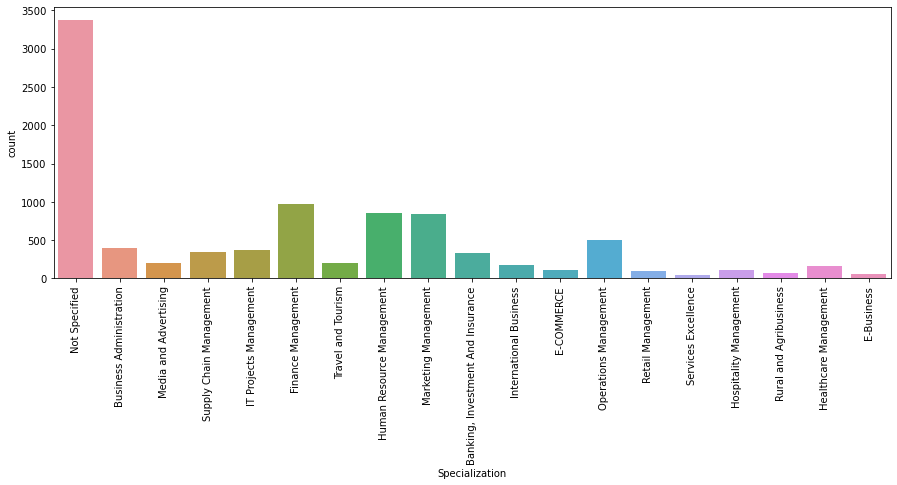

In [411]:
#plotting spread of Specialization columnn 

plt.figure(figsize=(15,5))
s1=sns.countplot(df.Specialization)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

We see that specialization with **Management** in them have higher number of leads as well as leads converted.
So this is definitely a significant variable and should not be dropped.

In [412]:
#combining Management Specializations because they show similar trends

df['Specialization'] = df['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations')  

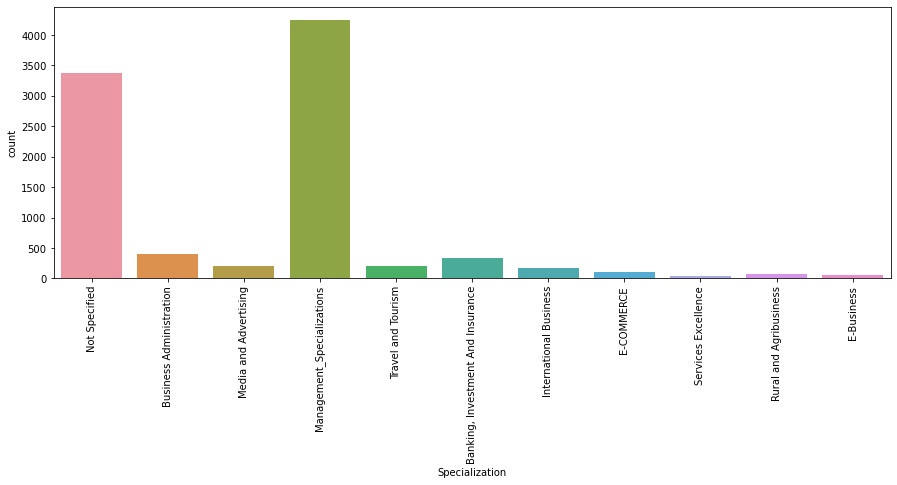

In [413]:
#visualizing count of Variable based on Converted value


plt.figure(figsize=(15,5))
s1=sns.countplot(df.Specialization)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [414]:
#What is your current occupation

df['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [415]:
#imputing Nan values with mode "Unemployed"

df['What is your current occupation'] = df['What is your current occupation'].replace(np.nan, 'Unemployed')

In [416]:
#checking count of values
df['What is your current occupation'].value_counts(dropna=False)

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

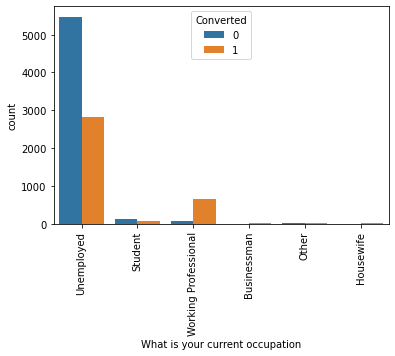

In [417]:
#visualizing count of Variable based on Converted value

s1=sns.countplot(df['What is your current occupation'], hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

- Working Professionals going for the course have high chances of joining it.
- Unemployed leads are the most in terms of Absolute numbers.

In [418]:
#checking value counts

df['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [419]:
#replacing Nan values with Mode "Better Career Prospects"

df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

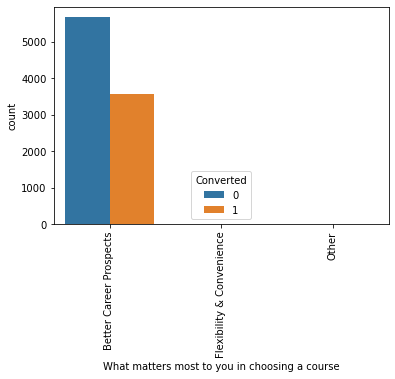

In [420]:
#visualizing count of Variable based on Converted value

s1=sns.countplot(df['What matters most to you in choosing a course'], hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [421]:
#checking value counts of variable
df['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [422]:
#Here again we have another Column that is worth Dropping. So we Append to the cols_to_drop List
drop_col.append('What matters most to you in choosing a course')
drop_col

['Country', 'What matters most to you in choosing a course']

In [423]:
#checking value counts of Tag variable
df['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [424]:
#replacing Nan values with "Not Specified"
df['Tags'] = df['Tags'].replace(np.nan,'Not Specified')

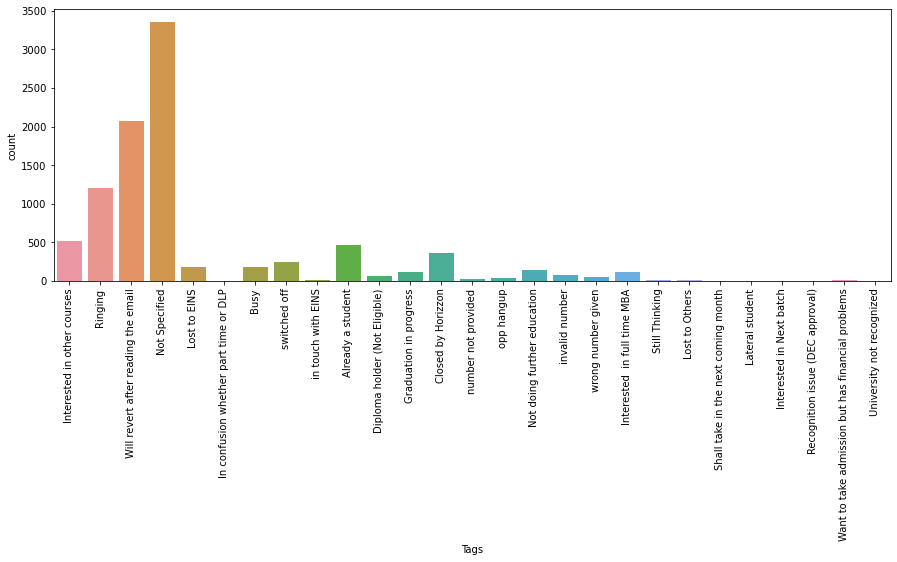

In [425]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))
s1=sns.countplot(df['Tags'])
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [426]:
#replacing tags with low frequency with "Other Tags"
df['Tags'] = df['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

df['Tags'] = df['Tags'].replace(['switched off',
                                      'Already a student',
                                       'Not doing further education',
                                       'invalid number',
                                       'wrong number given',
                                       'Interested  in full time MBA'] , 'Other_Tags')

In [427]:
#checking percentage of missing values
round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Origin                                     0.00
Lead Source                                     0.39
Do Not Email                                    0.00
Do Not Call                                     0.00
Converted                                       0.00
TotalVisits                                     1.48
Total Time Spent on Website                     0.00
Page Views Per Visit                            1.48
Last Activity                                   1.11
Country                                         0.00
Specialization                                  0.00
What is your current occupation                 0.00
What matters most to you in choosing a course   0.00
Search                                          0.00
Magazine                                        0.00
Newspaper Article                               0.00
X Education Forums                              0.00
Newspaper                                       0.00
Digital Advertisement                         

In [428]:
#checking value counts of Lead Source column

df['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
blog                    1
WeLearn                 1
NC_EDM                  1
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
Name: Lead Source, dtype: int64

In [429]:
#replacing Nan Values and combining low frequency values
df['Lead Source'] = df['Lead Source'].replace(np.nan,'Others')
df['Lead Source'] = df['Lead Source'].replace('google','Google')
df['Lead Source'] = df['Lead Source'].replace('Facebook','Social Media')
df['Lead Source'] = df['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others')                                                   

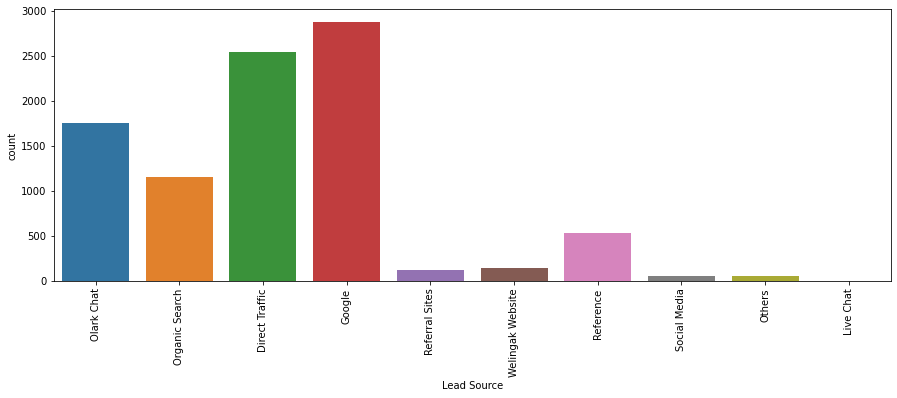

In [430]:
#visualizing count of Variable based on Converted value
plt.figure(figsize=(15,5))
s1=sns.countplot(df['Lead Source'])
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

#### Inference
- Maximum number of leads are generated by Google and Direct traffic.
- Conversion Rate of reference leads and leads through welingak website is high.
- To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.

In [431]:
# Last Activity:

df['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [432]:
#replacing Nan Values and combining low frequency values

df['Last Activity'] = df['Last Activity'].replace(np.nan,'Others')
df['Last Activity'] = df['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

In [433]:
# Last Activity:

df['Last Activity'].value_counts(dropna=False)

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others                        308
Email Link Clicked            267
Form Submitted on Website     116
Name: Last Activity, dtype: int64

In [434]:
#Check the Null Values in All Columns:
round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Origin                                     0.00
Lead Source                                     0.00
Do Not Email                                    0.00
Do Not Call                                     0.00
Converted                                       0.00
TotalVisits                                     1.48
Total Time Spent on Website                     0.00
Page Views Per Visit                            1.48
Last Activity                                   0.00
Country                                         0.00
Specialization                                  0.00
What is your current occupation                 0.00
What matters most to you in choosing a course   0.00
Search                                          0.00
Magazine                                        0.00
Newspaper Article                               0.00
X Education Forums                              0.00
Newspaper                                       0.00
Digital Advertisement                         

In [435]:
#Drop all rows which have Nan Values. Since the number of Dropped rows is less than 2%, it will not affect the model
df = df.dropna()

In [436]:
#Checking percentage of Null Values in All Columns:
round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Origin                                     0.00
Lead Source                                     0.00
Do Not Email                                    0.00
Do Not Call                                     0.00
Converted                                       0.00
TotalVisits                                     0.00
Total Time Spent on Website                     0.00
Page Views Per Visit                            0.00
Last Activity                                   0.00
Country                                         0.00
Specialization                                  0.00
What is your current occupation                 0.00
What matters most to you in choosing a course   0.00
Search                                          0.00
Magazine                                        0.00
Newspaper Article                               0.00
X Education Forums                              0.00
Newspaper                                       0.00
Digital Advertisement                         

In [437]:
#Lead Origin
df['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4886
API                        3578
Lead Add Form               608
Lead Import                  31
Name: Lead Origin, dtype: int64

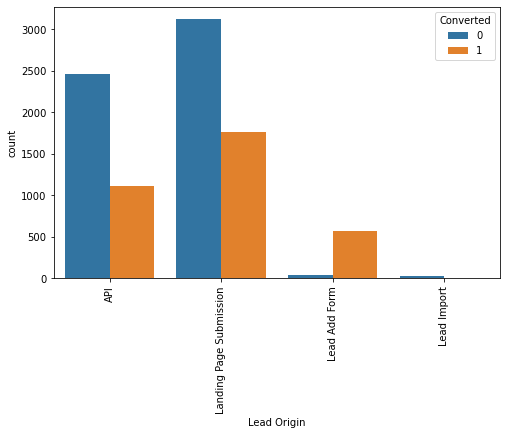

In [438]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(8,5))
s1=sns.countplot(df['Lead Origin'], hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

#### Inference
- API and Landing Page Submission bring higher number of leads as well as conversion.
- Lead Add Form has a very high conversion rate but count of leads are not very high.
- Lead Import and Quick Add Form get very few leads.
- In order to improve overall lead conversion rate, we have to improve lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

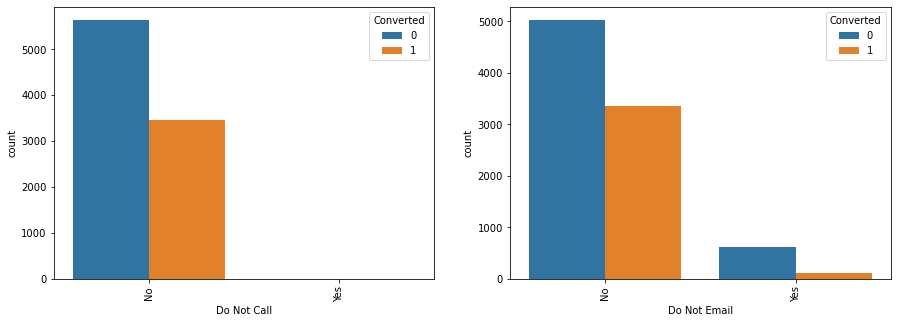

In [439]:
#Do Not Email & Do Not Call
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))

ax1=plt.subplot(1, 2, 1)
ax1=sns.countplot(df['Do Not Call'], hue=df.Converted)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)

ax2=plt.subplot(1, 2, 2)
ax2=sns.countplot(df['Do Not Email'], hue=df.Converted)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
plt.show()

In [440]:
#checking value counts for Do Not Call
df['Do Not Call'].value_counts(dropna=False)

No     9101
Yes       2
Name: Do Not Call, dtype: int64

In [441]:
#checking value counts for Do Not Email
df['Do Not Email'].value_counts(dropna=False)

No     8379
Yes     724
Name: Do Not Email, dtype: int64

We Can append the **Do Not Call** Column to the list of Columns to be Dropped since > 90% is of only one Value

In [442]:
drop_col.append('Do Not Call')
drop_col

['Country', 'What matters most to you in choosing a course', 'Do Not Call']

In [443]:
# IMBALANCED VARIABLES THAT CAN BE DROPPED

In [444]:
df.Search.value_counts(dropna=False)

No     9089
Yes      14
Name: Search, dtype: int64

In [445]:
df.Magazine.value_counts(dropna=False)

No    9103
Name: Magazine, dtype: int64

In [446]:
df['Newspaper Article'].value_counts(dropna=False)

No     9101
Yes       2
Name: Newspaper Article, dtype: int64

In [447]:
df['X Education Forums'].value_counts(dropna=False)

No     9102
Yes       1
Name: X Education Forums, dtype: int64

In [448]:
df['Newspaper'].value_counts(dropna=False)

No     9102
Yes       1
Name: Newspaper, dtype: int64

In [449]:
df['Digital Advertisement'].value_counts(dropna=False)

No     9099
Yes       4
Name: Digital Advertisement, dtype: int64

In [450]:
df['Through Recommendations'].value_counts(dropna=False)

No     9096
Yes       7
Name: Through Recommendations, dtype: int64

In [451]:
df['Receive More Updates About Our Courses'].value_counts(dropna=False)

No    9103
Name: Receive More Updates About Our Courses, dtype: int64

In [452]:
df['Update me on Supply Chain Content'].value_counts(dropna=False)

No    9103
Name: Update me on Supply Chain Content, dtype: int64

In [453]:
df['Get updates on DM Content'].value_counts(dropna=False)

No    9103
Name: Get updates on DM Content, dtype: int64

In [454]:
df['I agree to pay the amount through cheque'].value_counts(dropna=False)

No    9103
Name: I agree to pay the amount through cheque, dtype: int64

In [455]:
df['A free copy of Mastering The Interview'].value_counts(dropna=False)

No     6215
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [456]:
#adding imbalanced columns to the list of columns to be dropped
drop_col.extend(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque'])

In [457]:
#checking value counts of last Notable Activity
df['Last Notable Activity'].value_counts()

Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
View in browser link Clicked       1
Form Submitted on Website          1
Approached upfront                 1
Email Received                     1
Resubscribed to emails             1
Name: Last Notable Activity, dtype: int64

In [458]:
#clubbing lower frequency values

df['Last Notable Activity'] = df['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Other_Notable_activity')

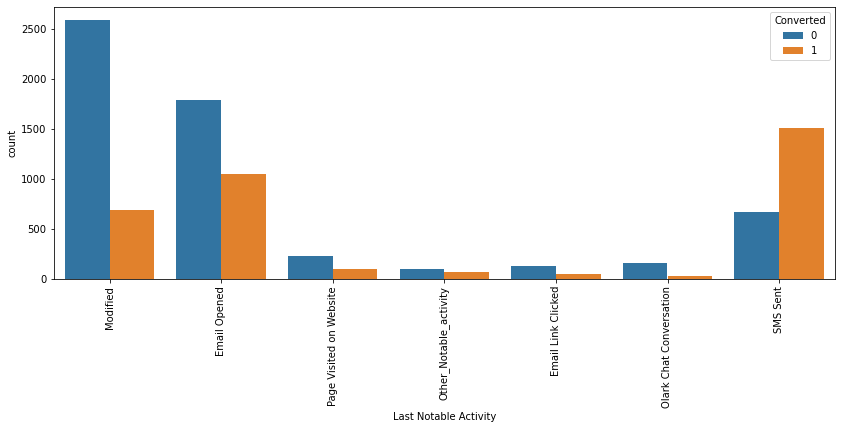

In [459]:
#visualizing count of Variable based on Converted value

plt.figure(figsize = (14,5))
ax1=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = df)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

In [460]:
#checking value counts for variable

df['Last Notable Activity'].value_counts()

Modified                   3270
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Other_Notable_activity      160
Name: Last Notable Activity, dtype: int64

In [461]:
#list of columns to be dropped
drop_col

['Country',
 'What matters most to you in choosing a course',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [462]:
#dropping columns
df = df.drop(drop_col,1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   object 
 3   Converted                               9103 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9103 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9103 non-null   object 
 8   Specialization                          9103 non-null   object 
 9   What is your current occupation         9103 non-null   object 
 10  Tags                                    9103 non-null   obje

## Numerical Attributes Analysis:

In [463]:
#Check the % of Data that has Converted Values = 1:

Converted = (sum(df['Converted'])/len(df['Converted'].index))*100
Converted

38.02043282434362

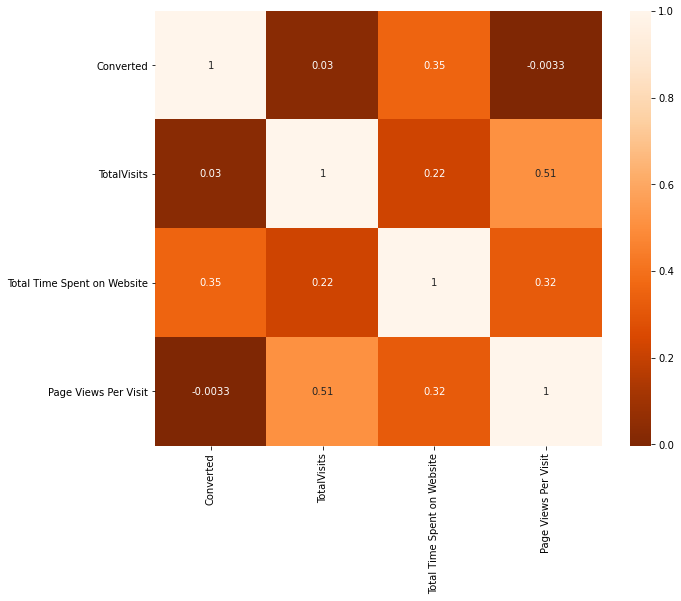

In [464]:
#Checking correlations of numeric values
# figure size
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(df.corr(), cmap="Oranges_r", annot=True)
plt.show()

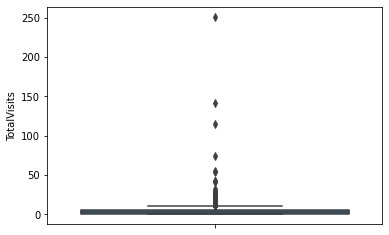

In [465]:
#Total Visits
#visualizing spread of variable

plt.figure(figsize=(6,4))
sns.boxplot(y=df['TotalVisits'])
plt.show()

We can see presence of outliers here

In [466]:
#checking percentile values for "Total Visits"

df['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count   9103.00
mean       3.45
std        4.85
min        0.00
5%         0.00
25%        1.00
50%        3.00
75%        5.00
90%        7.00
95%       10.00
99%       17.00
max      251.00
Name: TotalVisits, dtype: float64

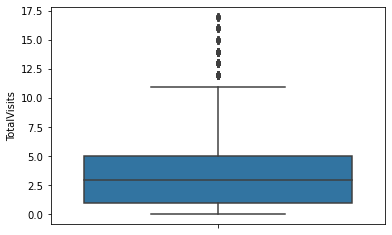

In [467]:
#Outlier Treatment: Remove top & bottom 1% of the Column Outlier values

Q3 = df.TotalVisits.quantile(0.99)
df = df[(df.TotalVisits <= Q3)]
Q1 = df.TotalVisits.quantile(0.01)
df = df[(df.TotalVisits >= Q1)]
sns.boxplot(y=df['TotalVisits'])
plt.show()

In [468]:
df.shape

(9020, 14)

In [469]:
#checking percentiles for "Total Time Spent on Website"

df['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count   9020.00
mean     479.76
std      544.69
min        0.00
5%         0.00
25%        7.00
50%      243.00
75%      915.25
90%     1371.00
95%     1554.05
99%     1836.62
max     2272.00
Name: Total Time Spent on Website, dtype: float64

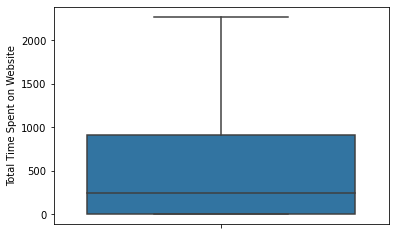

In [470]:
#visualizing spread of numeric variable

plt.figure(figsize=(6,4))
sns.boxplot(y=df['Total Time Spent on Website'])
plt.show()

Since there are no major Outliers for the above variable we don't do any Outlier Treatment for this above Column

In [471]:
#checking spread of "Page Views Per Visit"

df['Page Views Per Visit'].describe()

count   9020.00
mean       2.34
std        2.06
min        0.00
25%        1.00
50%        2.00
75%        3.00
max       16.00
Name: Page Views Per Visit, dtype: float64

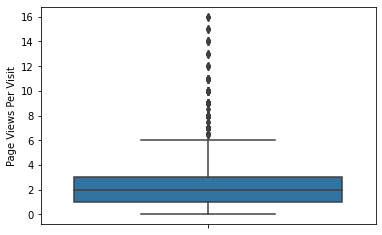

In [472]:
#visualizing spread of numeric variable

plt.figure(figsize=(6,4))
sns.boxplot(y=df['Page Views Per Visit'])
plt.show()

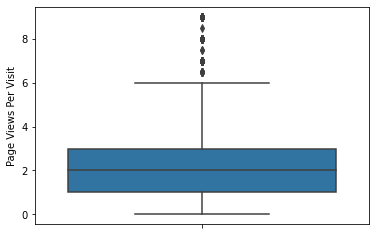

In [473]:
#Outlier Treatment: Remove top & bottom 1% 

Q3 = df['Page Views Per Visit'].quantile(0.99)
df = df[df['Page Views Per Visit'] <= Q3]
Q1 = df['Page Views Per Visit'].quantile(0.01)
df = df[df['Page Views Per Visit'] >= Q1]
sns.boxplot(y=df['Page Views Per Visit'])
plt.show()

In [474]:
df.shape

(8953, 14)

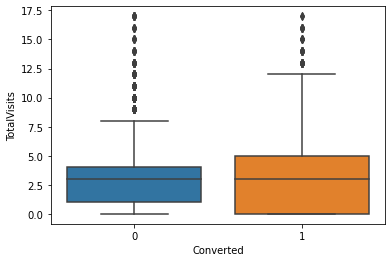

In [475]:
#checking Spread of "Total Visits" vs Converted variable
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df)
plt.show()

Inference
- Median for converted and not converted leads are the close.
- Nothng conclusive can be said on the basis of Total Visits

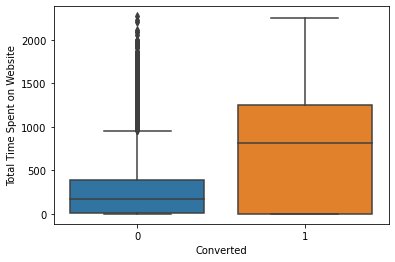

In [476]:
#checking Spread of "Total Time Spent on Website" vs Converted variable

sns.boxplot(x=df.Converted, y=df['Total Time Spent on Website'])
plt.show()

Inference
- Leads spending more time on the website are more likely to be converted.
- Website should be made more engaging to make leads spend more time.

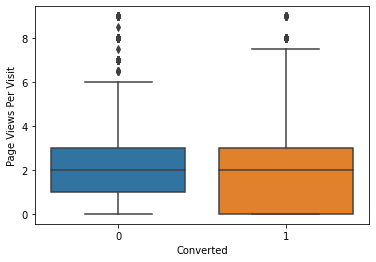

In [477]:
#checking Spread of "Page Views Per Visit" vs Converted variable

sns.boxplot(x=df.Converted,y=df['Page Views Per Visit'])
plt.show()

Inference
- Median for converted and unconverted leads is the same.
- Nothing can be said specifically for lead conversion from Page Views Per Visit

In [478]:
#checking missing values in leftover columns/

round(100*(df.isnull().sum()/len(df.index)),2)

Lead Origin                              0.00
Lead Source                              0.00
Do Not Email                             0.00
Converted                                0.00
TotalVisits                              0.00
Total Time Spent on Website              0.00
Page Views Per Visit                     0.00
Last Activity                            0.00
Specialization                           0.00
What is your current occupation          0.00
Tags                                     0.00
City                                     0.00
A free copy of Mastering The Interview   0.00
Last Notable Activity                    0.00
dtype: float64

There are no missing values in the columns to be analyzed further

## Dummy Variable Creation:

In [479]:
#getting a list of categorical columns

cat_cols= df.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [480]:
# List of variables to map

varlist =  ['A free copy of Mastering The Interview','Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)

In [481]:
#getting dummies and dropping the first column and adding the results to the master dataframe
dummy = pd.get_dummies(df[['Lead Origin','What is your current occupation',
                             'City']], drop_first=True)

df = pd.concat([df,dummy],1)

In [482]:
dummy = pd.get_dummies(df['Specialization'], prefix  = 'Specialization')
dummy = dummy.drop(['Specialization_Not Specified'], 1)
df = pd.concat([df, dummy], axis = 1)

In [483]:
dummy = pd.get_dummies(df['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], 1)
df = pd.concat([df, dummy], axis = 1)

In [484]:
dummy = pd.get_dummies(df['Last Activity'], prefix  = 'Last Activity')
dummy = dummy.drop(['Last Activity_Others'], 1)
df = pd.concat([df, dummy], axis = 1)

In [485]:
dummy = pd.get_dummies(df['Last Notable Activity'], prefix  = 'Last Notable Activity')
dummy = dummy.drop(['Last Notable Activity_Other_Notable_activity'], 1)
df = pd.concat([df, dummy], axis = 1)

In [486]:
dummy = pd.get_dummies(df['Tags'], prefix  = 'Tags')
dummy = dummy.drop(['Tags_Not Specified'], 1)
df = pd.concat([df, dummy], axis = 1)

In [487]:
#dropping the original columns after dummy variable creation

df.drop(cat_cols,1,inplace = True)

In [488]:
df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
0,0,0.00,0,0.00,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,5.00,674,2.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,2.00,1532,2.00,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0,1.00,305,1.00,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,2.00,1428,1.00,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## Train-Test Split & Logistic Regression Model Building:

In [489]:
from sklearn.model_selection import train_test_split

# Putting response variable to y
y = df['Converted']

y.head()

X=df.drop('Converted', axis=1)

In [490]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [491]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6267 entries, 9196 to 5825
Data columns (total 56 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           6267 non-null   float64
 1   Total Time Spent on Website                           6267 non-null   int64  
 2   Page Views Per Visit                                  6267 non-null   float64
 3   Lead Origin_Landing Page Submission                   6267 non-null   uint8  
 4   Lead Origin_Lead Add Form                             6267 non-null   uint8  
 5   Lead Origin_Lead Import                               6267 non-null   uint8  
 6   What is your current occupation_Housewife             6267 non-null   uint8  
 7   What is your current occupation_Other                 6267 non-null   uint8  
 8   What is your current occupation_Student               6

### Scaling of Data:

In [492]:
#scaling numeric columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
9196,0.67,1.85,1.46,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
4696,-0.03,-0.04,0.40,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
3274,0.32,-0.64,-0.13,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2164,-0.38,-0.15,-0.13,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1667,0.32,1.26,-0.48,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


### Model Building using Stats Model & RFE:

In [493]:
import statsmodels.api as sm

In [494]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [495]:
rfe.support_

array([False,  True, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
        True,  True, False,  True, False,  True,  True,  True,  True,
        True,  True])

In [496]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 26),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 24),
 ('Lead Origin_Landing Page Submission', False, 10),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 16),
 ('What is your current occupation_Housewife', False, 31),
 ('What is your current occupation_Other', False, 34),
 ('What is your current occupation_Student', False, 23),
 ('What is your current occupation_Unemployed', False, 20),
 ('What is your current occupation_Working Professional', False, 8),
 ('City_Other Cities', False, 22),
 ('City_Other Cities of Maharashtra', False, 37),
 ('City_Other Metro Cities', False, 40),
 ('City_Thane & Outskirts', False, 38),
 ('City_Tier II Cities', False, 28),
 ('Specialization_Banking, Investment And Insurance', False, 14),
 ('Specialization_Business Administration', False, 39),
 ('Specialization_E-Business', False, 35),
 ('Specialization_E-COMMERCE', False, 21),
 ('Specialization_International Business', F

In [497]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Other_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email'],
      dtype='object')

In [498]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Other Metro Cities', 'City_Thane & Outskirts',
       'City_Tier II Cities',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management_Specializations',
       'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism', 'Lead Sourc

## BUILDING MODEL 



In [499]:
#BUILDING MODEL #1

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6251
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1254.7
Date:                Sun, 13 Jun 2021   Deviance:                       2509.3
Time:                        23:43:30   Pearson chi2:                 8.34e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.1899      0.088    -13.480      0.000      -1.363      -1.017
Total Time Spent on Website                       0.8970      0.053     16.999      0.000       0.794       1.000
Lead Origin_Lead Add Form                         1.6712      0.450      3.714      0.000       0.789       2.553
Lead Source_Direct Traffic                       -0.8320      0.129     -6.471      0.000      -1.084      -0.580
Lead Source_Referral Sites                       -0.5284      0.465     -1.138      0.255      -1.439       0.382
Lead Source_Welingak Website                      3.9043      1.110      3.518      0.000       1.729       6.079
Last Activity_SMS Sent                            1.2373      0.223      5.555      0.000       0.801       1.674
Last Notable Activity_Modified                   -1.2839      0.150     -8.532      0.000      -1.579      -0.989
Last Notable Activity_Olark Chat Conversation    -1.7123      0.490     -3.496      0.000      -2.672      -0.752
Last Notable Activity_SMS Sent                    1.0151      0.257      3.943      0.000       0.511       1.520
Tags_Closed by Horizzon                           6.9834      1.019      6.853      0.000       4.986       8.981
Tags_Interested in other courses                 -2.1641      0.407     -5.321      0.000      -2.961      -1.367
Tags_Lost to EINS                                 5.7302      0.608      9.419      0.000       4.538       6.923
Tags_Other_Tags                                  -2.4417      0.210    -11.633      0.000      -2.853      -2.030
Tags_Ringing                                     -3.5858      0.243    -14.752      0.000      -4.062      -3.109
Tags_Will revert after reading the email          4.4263      0.185     23.989      0.000       4.065       4.788
=================================================================================================================
"""

p-value of variable Lead Source_Referral Sites is high, so we can drop it.

In [500]:
#dropping column with high p-value

col = col.drop('Lead Source_Referral Sites',1)

In [501]:
#BUILDING MODEL #2

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6252
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1255.3
Date:                Sun, 13 Jun 2021   Deviance:                       2510.7
Time:                        23:43:30   Pearson chi2:                 8.34e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.2029      0.088    -13.729      0.000      -1.375      -1.031
Total Time Spent on Website                       0.8963      0.053     16.979      0.000       0.793       1.000
Lead Origin_Lead Add Form                         1.6795      0.450      3.735      0.000       0.798       2.561
Lead Source_Direct Traffic                       -0.8224      0.128     -6.409      0.000      -1.074      -0.571
Lead Source_Welingak Website                      3.9060      1.110      3.520      0.000       1.731       6.081
Last Activity_SMS Sent                            1.2437      0.223      5.584      0.000       0.807       1.680
Last Notable Activity_Modified                   -1.2791      0.150     -8.501      0.000      -1.574      -0.984
Last Notable Activity_Olark Chat Conversation    -1.7079      0.489     -3.491      0.000      -2.667      -0.749
Last Notable Activity_SMS Sent                    1.0150      0.257      3.943      0.000       0.510       1.520
Tags_Closed by Horizzon                           6.9868      1.019      6.857      0.000       4.990       8.984
Tags_Interested in other courses                 -2.2028      0.409     -5.391      0.000      -3.004      -1.402
Tags_Lost to EINS                                 5.7337      0.608      9.426      0.000       4.541       6.926
Tags_Other_Tags                                  -2.4401      0.210    -11.625      0.000      -2.852      -2.029
Tags_Ringing                                     -3.5818      0.243    -14.740      0.000      -4.058      -3.106
Tags_Will revert after reading the email          4.4234      0.184     23.993      0.000       4.062       4.785
=================================================================================================================
"""

Since 'All' the p-values are less we can check the Variance Inflation Factor to see if there is any correlation between the variables

In [502]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [503]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Last Notable Activity_SMS Sent,6.22
4,Last Activity_SMS Sent,6.12
1,Lead Origin_Lead Add Form,1.82
5,Last Notable Activity_Modified,1.69
13,Tags_Will revert after reading the email,1.61
2,Lead Source_Direct Traffic,1.38
3,Lead Source_Welingak Website,1.34
11,Tags_Other_Tags,1.26
0,Total Time Spent on Website,1.22
8,Tags_Closed by Horizzon,1.21


There is a high correlation between two variables so we drop the variable with the higher valued VIF value

In [504]:
#dropping variable with high VIF

col = col.drop('Last Notable Activity_SMS Sent',1)

In [505]:
#BUILDING MODEL #3
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6253
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1263.3
Date:                Sun, 13 Jun 2021   Deviance:                       2526.6
Time:                        23:43:31   Pearson chi2:                 8.51e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.1179      0.084    -13.382      0.000      -1.282      -0.954
Total Time Spent on Website                       0.8896      0.053     16.907      0.000       0.786       0.993
Lead Origin_Lead Add Form                         1.6630      0.455      3.657      0.000       0.772       2.554
Lead Source_Direct Traffic                       -0.8212      0.127     -6.471      0.000      -1.070      -0.572
Lead Source_Welingak Website                      3.8845      1.114      3.488      0.000       1.701       6.068
Last Activity_SMS Sent                            1.9981      0.113     17.718      0.000       1.777       2.219
Last Notable Activity_Modified                   -1.6525      0.124    -13.279      0.000      -1.896      -1.409
Last Notable Activity_Olark Chat Conversation    -1.8023      0.491     -3.669      0.000      -2.765      -0.839
Tags_Closed by Horizzon                           7.1955      1.020      7.053      0.000       5.196       9.195
Tags_Interested in other courses                 -2.1318      0.406     -5.253      0.000      -2.927      -1.336
Tags_Lost to EINS                                 5.9177      0.611      9.689      0.000       4.721       7.115
Tags_Other_Tags                                  -2.3737      0.206    -11.507      0.000      -2.778      -1.969
Tags_Ringing                                     -3.4531      0.238    -14.532      0.000      -3.919      -2.987
Tags_Will revert after reading the email          4.5070      0.188     24.002      0.000       4.139       4.875
=================================================================================================================
"""

In [506]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,1.82
12,Tags_Will revert after reading the email,1.56
4,Last Activity_SMS Sent,1.46
5,Last Notable Activity_Modified,1.40
2,Lead Source_Direct Traffic,1.38
3,Lead Source_Welingak Website,1.34
10,Tags_Other_Tags,1.25
0,Total Time Spent on Website,1.22
7,Tags_Closed by Horizzon,1.21
11,Tags_Ringing,1.16


So the Values all seem to be in order so now, Moving on to derive the Probabilities, Lead Score, Predictions on Train Data:

In [507]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

9196   0.28
4696   0.03
3274   0.58
2164   0.01
1667   0.99
7024   0.13
8018   0.02
778    0.21
6942   0.00
4440   0.10
dtype: float64

In [508]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.28314859, 0.0314396 , 0.57663553, 0.00643284, 0.98910464,
       0.13081306, 0.02421913, 0.20559401, 0.00267787, 0.09671623])

In [509]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.28,9196
1,0,0.03,4696
2,0,0.58,3274
3,0,0.01,2164
4,1,0.99,1667


In [510]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,1,0.28,9196,0
1,0,0.03,4696,0
2,0,0.58,3274,1
3,0,0.01,2164,0
4,1,0.99,1667,1


In [511]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3693  189]
 [ 281 2104]]


In [512]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9250039891495133


In [513]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [514]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8821802935010482

In [515]:
# Let us calculate specificity
TN / float(TN+FP)

0.9513137557959814

In [516]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.04868624420401855


In [517]:
# positive predictive value 
print (TP / float(TP+FP))

0.9175752289576974


In [518]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9292903875188727


### PLOTTING ROC CURVE


In [519]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [520]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

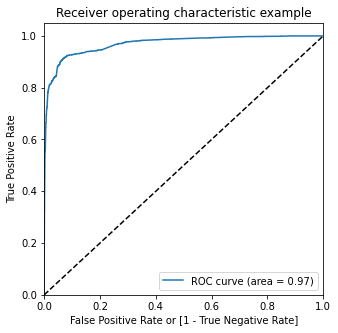

In [521]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

The ROC Curve should be a value close to 1. We are getting a good value of 0.97 indicating a good predictive model.

### Finding Optimal Cutoff Point

Above we had chosen an arbitrary cut-off value of 0.5. We need to determine the best cut-off value and the below section deals with that: 

In [522]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.28,9196,0,1,1,1,0,0,0,0,0,0,0
1,0,0.03,4696,0,1,0,0,0,0,0,0,0,0,0
2,0,0.58,3274,1,1,1,1,1,1,1,0,0,0,0
3,0,0.01,2164,0,1,0,0,0,0,0,0,0,0,0
4,1,0.99,1667,1,1,1,1,1,1,1,1,1,1,1


In [523]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy  sensi  speci
0.00  0.00      0.38   1.00   0.00
0.10  0.10      0.82   0.97   0.72
0.20  0.20      0.90   0.93   0.88
0.30  0.30      0.92   0.92   0.93
0.40  0.40      0.93   0.90   0.94
0.50  0.50      0.93   0.88   0.95
0.60  0.60      0.92   0.83   0.97
0.70  0.70      0.92   0.81   0.98
0.80  0.80      0.91   0.77   0.99
0.90  0.90      0.89   0.72   0.99


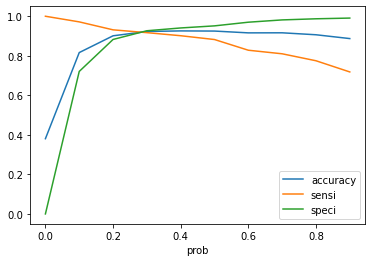

In [524]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [525]:
#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,1,0.28,9196,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.03,4696,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.58,3274,1,1,1,1,1,1,1,0,0,0,0,1
3,0,0.01,2164,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.99,1667,1,1,1,1,1,1,1,1,1,1,1,1


In [526]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,1,0.28,9196,0,28
1,0,0.03,4696,0,3
2,0,0.58,3274,1,58
3,0,0.01,2164,0,1
4,1,0.99,1667,1,99


In [527]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.922929631402585

In [528]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3597,  285],
       [ 198, 2187]], dtype=int64)

In [529]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [530]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9169811320754717

In [531]:
# Let us calculate specificity
TN / float(TN+FP)

0.9265842349304482

### Observation:
So as we can see above the model seems to be performing well. The ROC curve has a value of 0.97, which is very good. We have the following values for the Train Data:
- Accuracy : 92.29%
- Sensitivity : 91.70%
- Specificity : 92.66%

Some of the other Stats are derived below, indicating the False Positive Rate, Positive Predictive Value,Negative Predictive Values, Precision & Recall. 

In [532]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.07341576506955177


In [533]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8847087378640777


In [534]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9478260869565217


In [535]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[3597,  285],
       [ 198, 2187]], dtype=int64)

In [536]:
##### Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8847087378640777

In [537]:
##### Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.9169811320754717

In [538]:
from sklearn.metrics import precision_score, recall_score

In [539]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.8847087378640777

In [540]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9169811320754717

In [541]:
from sklearn.metrics import precision_recall_curve

In [542]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

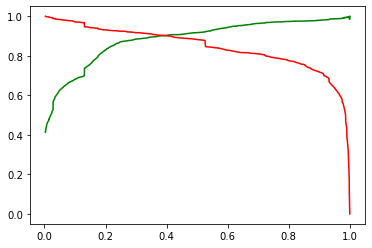

In [543]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [544]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
7681,0.58,-0.31,0.09,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
984,-0.09,-0.55,0.36,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
8135,-0.42,0.81,-0.17,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
6915,0.24,-0.63,-0.17,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2712,-0.09,-0.42,0.36,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [545]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Welingak Website,Last Activity_SMS Sent,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
7681,-0.31,0,1,0,1,0,0,0,0,0,0,1,0
984,-0.55,0,0,0,1,1,0,0,0,0,1,0,0
8135,0.81,0,1,0,1,0,0,0,0,0,0,0,0
6915,-0.63,0,0,0,0,0,0,0,0,0,0,1,0
2712,-0.42,0,0,0,0,0,0,0,0,0,0,0,1


In [546]:
X_test_sm = sm.add_constant(X_test)

### PREDICTIONS ON TEST SET


In [547]:
y_test_pred = res.predict(X_test_sm)

In [548]:
y_test_pred[:10]

7681   0.02
984    0.03
8135   0.69
6915   0.01
2712   0.95
244    0.00
4698   0.01
8287   0.03
6791   0.98
8970   0.01
dtype: float64

In [549]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [550]:
# Let's see the head
y_pred_1.head()

,0
7681,0.02
984,0.03
8135,0.69
6915,0.01
2712,0.95


In [551]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [552]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [553]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [554]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [555]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,7681,0.02
1,0,984,0.03
2,0,8135,0.69
3,0,6915,0.01
4,1,2712,0.95


In [556]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [557]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,7681,0.02
1,0,984,0.03
2,0,8135,0.69
3,0,6915,0.01
4,1,2712,0.95


In [558]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [559]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,7681,0,0.02,2
1,984,0,0.03,3
2,8135,0,0.69,69
3,6915,0,0.01,1
4,2712,1,0.95,95


In [560]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [561]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,7681,0,0.02,2,0
1,984,0,0.03,3,0
2,8135,0,0.69,69,1
3,6915,0,0.01,1,0
4,2712,1,0.95,95,1


In [562]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9277736411020104

In [563]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1563,  113],
       [  81,  929]], dtype=int64)

In [564]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [565]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9198019801980198

In [566]:
# Let us calculate specificity
TN / float(TN+FP)

0.9325775656324582

In [567]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.8915547024952015

In [568]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9198019801980198

### Observation:
After running the model on the Test Data these are the figures we obtain:
- Accuracy : 92.78%
- Sensitivity : 91.98%
- Specificity : 93.26%

## Final Observation:

Let us compare the values obtained for Train & Test:

### <u> Train Data: </u>
- Accuracy : 92.29%
- Sensitivity : 91.70%
- Specificity : 92.66%

### <u> Test Data: </u>
- Accuracy : 92.78%
- Sensitivity : 91.98%
- Specificity : 93.26%

The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model

### Determining Feature Importance

In [569]:
#Selecting the coefficients of the selected features from our final model excluding the intercept

pd.options.display.float_format = '{:.2f}'.format
new_params = res.params[1:]
new_params

Total Time Spent on Website                      0.89
Lead Origin_Lead Add Form                        1.66
Lead Source_Direct Traffic                      -0.82
Lead Source_Welingak Website                     3.88
Last Activity_SMS Sent                           2.00
Last Notable Activity_Modified                  -1.65
Last Notable Activity_Olark Chat Conversation   -1.80
Tags_Closed by Horizzon                          7.20
Tags_Interested in other courses                -2.13
Tags_Lost to EINS                                5.92
Tags_Other_Tags                                 -2.37
Tags_Ringing                                    -3.45
Tags_Will revert after reading the email         4.51
dtype: float64

In [570]:
#### Getting a relative coeffient value for all the features wrt the feature with the highest coefficient

feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

Total Time Spent on Website                      12.36
Lead Origin_Lead Add Form                        23.11
Lead Source_Direct Traffic                      -11.41
Lead Source_Welingak Website                     53.99
Last Activity_SMS Sent                           27.77
Last Notable Activity_Modified                  -22.97
Last Notable Activity_Olark Chat Conversation   -25.05
Tags_Closed by Horizzon                         100.00
Tags_Interested in other courses                -29.63
Tags_Lost to EINS                                82.24
Tags_Other_Tags                                 -32.99
Tags_Ringing                                    -47.99
Tags_Will revert after reading the email         62.64
dtype: float64

In [571]:
#### Sorting the feature variables based on their relative coefficient values

sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')
sorted_idx

Total Time Spent on Website                      11
Lead Origin_Lead Add Form                        10
Lead Source_Direct Traffic                        8
Lead Source_Welingak Website                      6
Last Activity_SMS Sent                            5
Last Notable Activity_Modified                    2
Last Notable Activity_Olark Chat Conversation     0
Tags_Closed by Horizzon                           1
Tags_Interested in other courses                  4
Tags_Lost to EINS                                 3
Tags_Other_Tags                                  12
Tags_Ringing                                      9
Tags_Will revert after reading the email          7
dtype: int64

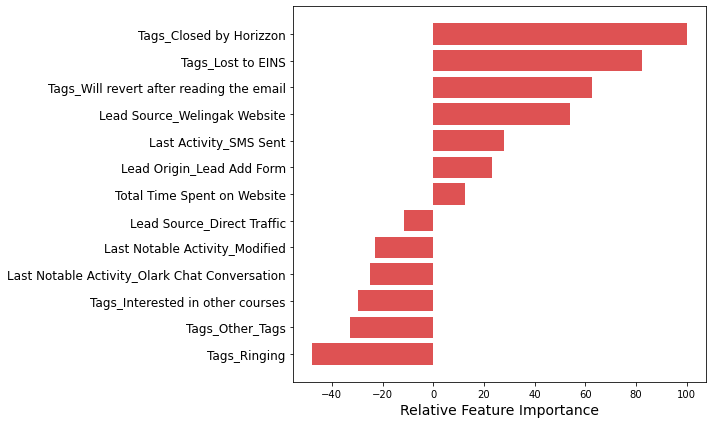

In [572]:
## Plot showing the feature variables based on their relative coefficient values
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(10,6))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center', color = 'tab:red',alpha=0.8)
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train[col].columns)[sorted_idx], fontsize=12)
featax.set_xlabel('Relative Feature Importance', fontsize=14)

plt.tight_layout()   
plt.show()

In [573]:
### Selecting `Top 3` features which contribute most towards the probability of a lead getting converted
pd.DataFrame(feature_importance).reset_index().sort_values(by=0,ascending=False).head(3)

,index,0
7,Tags_Closed by Horizzon,100.00
9,Tags_Lost to EINS,82.24
12,Tags_Will revert after reading the email,62.64


Based on our model, some features are identified which contribute most to a Lead getting converted successfully.
Another point to note here is that, depending on the business requirement, we can increase or decrease the probability threshold value with in turn will decrease or increase the Sensitivity and increase or decrease the Specificity of the model. *

* High Sensitivity will ensure that almost all leads who are likely to Convert are correctly predicted where as high Specificity will ensure that leads that are on the brink of the probability of getting Converted or not are not selected. *